In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Embedding,SimpleRNN, Dense
from keras.models import Model
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
# load the text dataset
num_words = 20000
(train_sequence,train_labels) , (test_sequence,test_labels) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
# Now convert words to the index
word_to_index = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [4]:
# Now convert all index to word
index_to_word = dict((index,word) for (word,index) in word_to_index.items())

In [5]:
# join all the words each other with space
" ".join([index_to_word.get(index - 3,"UNK") for index in train_sequence[0][1:]])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNK is an amazing actor and now the same being director UNK father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the UNK of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [6]:
# Set the sequence length
sequence_lengths = [len(sequence) for sequence in train_sequence]
max_len = max(sequence_lengths)
max_len

2494

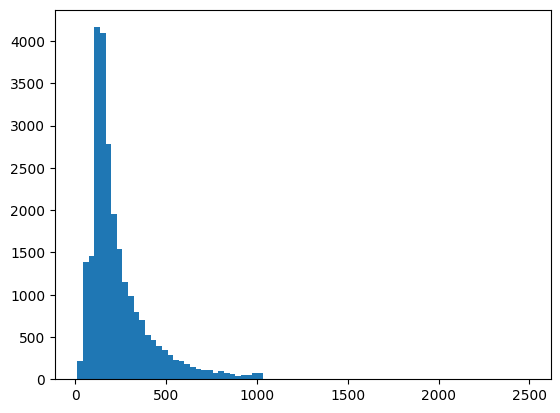

In [7]:
# overview of sequence in data
plt.hist(sequence_lengths, bins=80)
plt.show()

In [8]:
# Padding
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequence, maxlen=max_len)

In [9]:
# Now we can create the dataset
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

In [10]:
train_sequences_padded.shape

(25000, 2494)

In [11]:
# sequence length is very long limited to 200
max_len=200
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequence, maxlen=max_len)
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

train_sequences_padded.shape

(25000, 200)

Now we build the low level simple rnn model

In [12]:
num_words = 10000
maxlen = 200
batch_size = 32

(x_train,y_train) , (x_test,y_test) = imdb.load_data(num_words=num_words)

x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

In [13]:
# Now build a low level RNN using subclassing

class SimpleRNNModel(Model):
  def __init__(self,units):
    super(SimpleRNNModel,self).__init__()
    self.embedding = Embedding(num_words,32)
    self.rnn = SimpleRNN(units)
    self.dense = Dense(1,activation='sigmoid')


  def call(self,inputs):
    x = self.embedding(inputs)
    x = self.rnn(x)
    return self.dense(x)

units = 32
model = SimpleRNNModel(units)

In [14]:
# Now compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=10,batch_size=batch_size,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 204s 317ms/step - loss: 0.5982 - accuracy: 0.6660 - val_loss: 0.4672 - val_accuracy: 0.7906
Epoch 2/10
625/625 [==============================] - 117s 187ms/step - loss: 0.3776 - accuracy: 0.8385 - val_loss: 0.3953 - val_accuracy: 0.8278
Epoch 3/10
625/625 [==============================] - 109s 175ms/step - loss: 0.2828 - accuracy: 0.8856 - val_loss: 0.4127 - val_accuracy: 0.8326
Epoch 4/10
625/625 [==============================] - 107s 171ms/step - loss: 0.1969 - accuracy: 0.9244 - val_loss: 0.4180 - val_accuracy: 0.8500
Epoch 5/10
625/625 [==============================] - 105s 168ms/step - loss: 0.1161 - accuracy: 0.9582 - val_loss: 0.5033 - val_accuracy: 0.8374
Epoch 6/10
625/625 [==============================] - 107s 171ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.6250 - val_accuracy: 0.8258
Epoch 7/10
625/625 [==============================] - 100s 160ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.8385 -

In [17]:
loss , accuracy = model.evaluate(x_test,y_test,batch_size=batch_size)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)

782/782 [==============================] - 24s 31ms/step - loss: 0.9404 - accuracy: 0.7908
Test Loss:  0.9403653740882874
Test Accuracy:  0.7907999753952026
